In [10]:
import numpy as np
import matplotlib.pyplot as plt



In [2]:
np.__version__

'1.24.3'

In [89]:
# generate random data
m = 400
n = 100

A = np.random.randn(m, n)
x_star = np.random.randn(n)
b = A @ x_star + np.random.randn(m) * 0.1

loss = lambda x: np.linalg.norm(A @ x - b)**2/(2*m)
x_opt = np.linalg.lstsq(A, b)[0]
loss_opt = loss(x_opt)

/var/folders/bh/ksb5sf_15577shnrwg38rtt00000gr/T/ipykernel_32640/4096473355.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_opt = np.linalg.lstsq(A, b)[0]


In [90]:
# SGD
N_epoch = 50

x_init = np.zeros(n)

x = x_init
eta = 0.5
loss_SGD = [loss(x)]

x_sample = []

sampling_interval = 1
sampling_period = 10
for epoch in range(N_epoch):
    if epoch % sampling_interval == 0 and 1 <= epoch <= sampling_period:
            x_sample.append(x)
    list_perm = np.random.permutation(m)
    for index in  list_perm:    
        # randomly sample a row of the matrix A
        a_i = A[index,:]
        b_i = b[index]
        grad = a_i*(a_i.dot(x) - b_i)
        x = x - eta*grad/(a_i.dot(a_i))
        loss_SGD.append(loss(x))

In [98]:
# TWA
P = np.array(x_sample)
P, _ = np.linalg.qr(P.T)
P = P.T

N_epoch = 3000


# x = x_sample[-1]
x = x_init
eta = 0.05
loss_TWA = [loss(x)]

for i in range(N_epoch):
    # randomly sample a row of the matrix A
    index = np.random.randint(A.shape[0])
    a_i = A[index,:]
    b_i = b[index]
    a_proj = P @ a_i
    grad = P.T @ a_proj*(a_i.dot(x) - b_i)
    x = x - eta*grad/(a_proj.dot(a_proj))
    loss_TWA.append(loss(x))

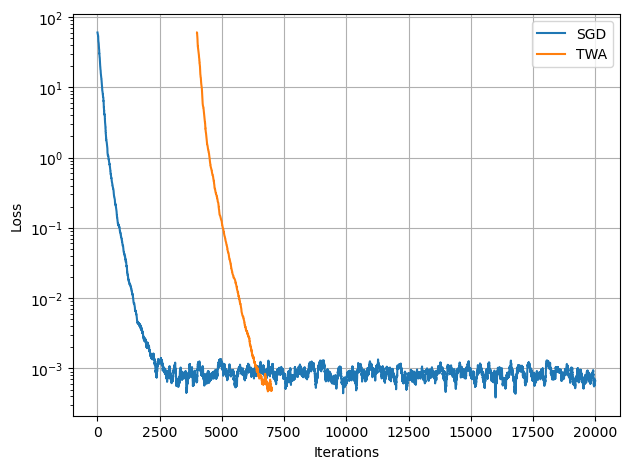

In [99]:
# plot figures
# the x axis is the number of iterations, and the y axis is the loss value
plt.figure()
plt.semilogy(loss_SGD-loss_opt,label='SGD')
plt.semilogy(sampling_period*m + np.arange(len(loss_TWA)), loss_TWA-loss_opt,label='TWA')
plt.grid(True)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.tight_layout()